#### 환경설정

In [1]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [2]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys

import matplotlib 

matplotlib.rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# Perceptron
: 가장 간단한 인공 신경망 구조 중 하나. 입력과 출력이 이진수가 아니라 어떤 숫자이고, 각각의 입력 연결은 가중치와 연관되어 있음.
- 퍼셉트론은 네트워크가 예측할 때 만드는 **오차를 반영하도록 조금 변형된 규칙을 사용**하여 훈련된다.
- 학습 규칙은 오차가 감소되도록 연결을 강화시킨다. 즉 퍼셉트론 한 번에 한 개의 샘플이 주입되면 각 샘플에 대해 예측이 만들어진다. 잘못된 예측을 하는 모든 출력 뉴런에 대해 올바른 예측을 만들 수 있도록 입력에 연결된 가중치를 강화시킨다.
- 퍼셉트론을 여러 개 쌓아올리면 일부 제약을 줄일 수 있다는 사실이 밝혀졌는데, 이러한 인공 신경망을 **다층 퍼셉트론(MLP)** 라고 한다. 다층 퍼셉트론은 XOR 문제를 풀 수 있다. [다층 퍼셉트론으로 XOR문제 해결하기](https://ang-love-chang.tistory.com/26)

# 다층 퍼셉트론과 역전파
다층 퍼셉트론은 하나의 입력층과 하나 이상의 은닉층, 출력층으로 구성된다. 출력층을 제외한 모든 층은 bias 뉴런을 포함하며(층마다 1개의 bias) 다음 층과 완전히 연결되어 있다. 은닉층을 여러 개 쌓아 올린 인공 신경망을 DNN(Deep Neural Network, 심층 신경망)이라고 한다.
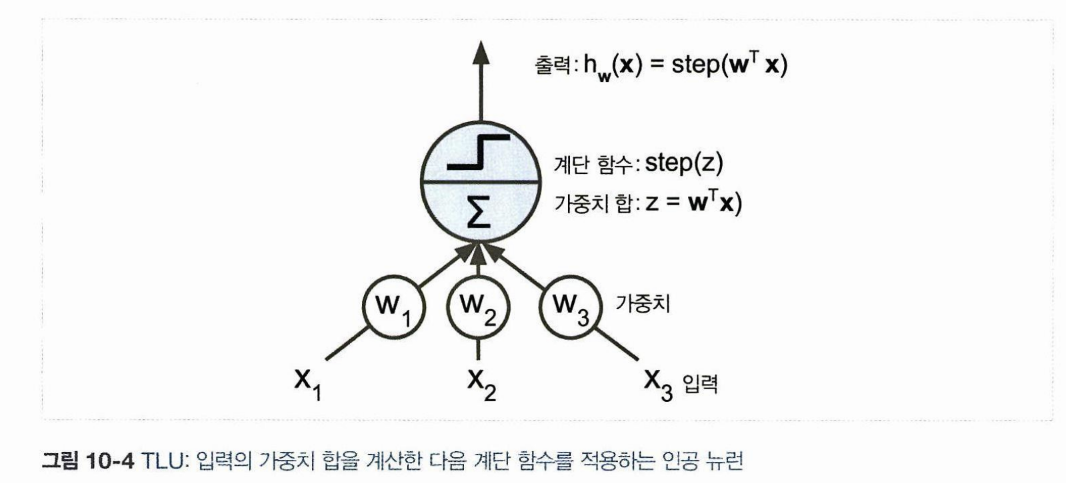
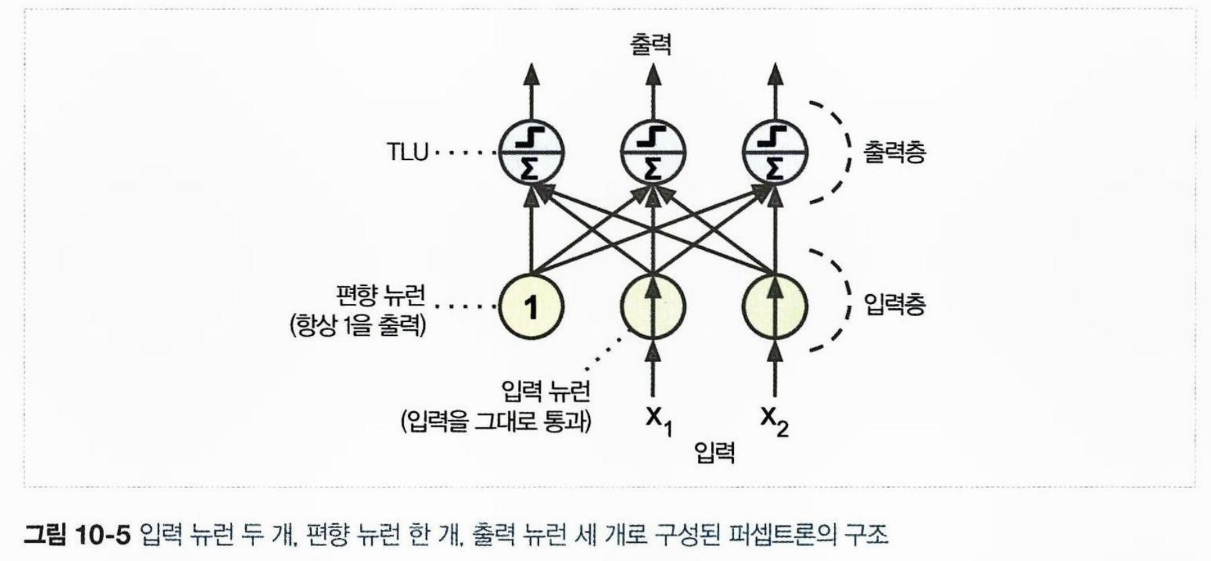
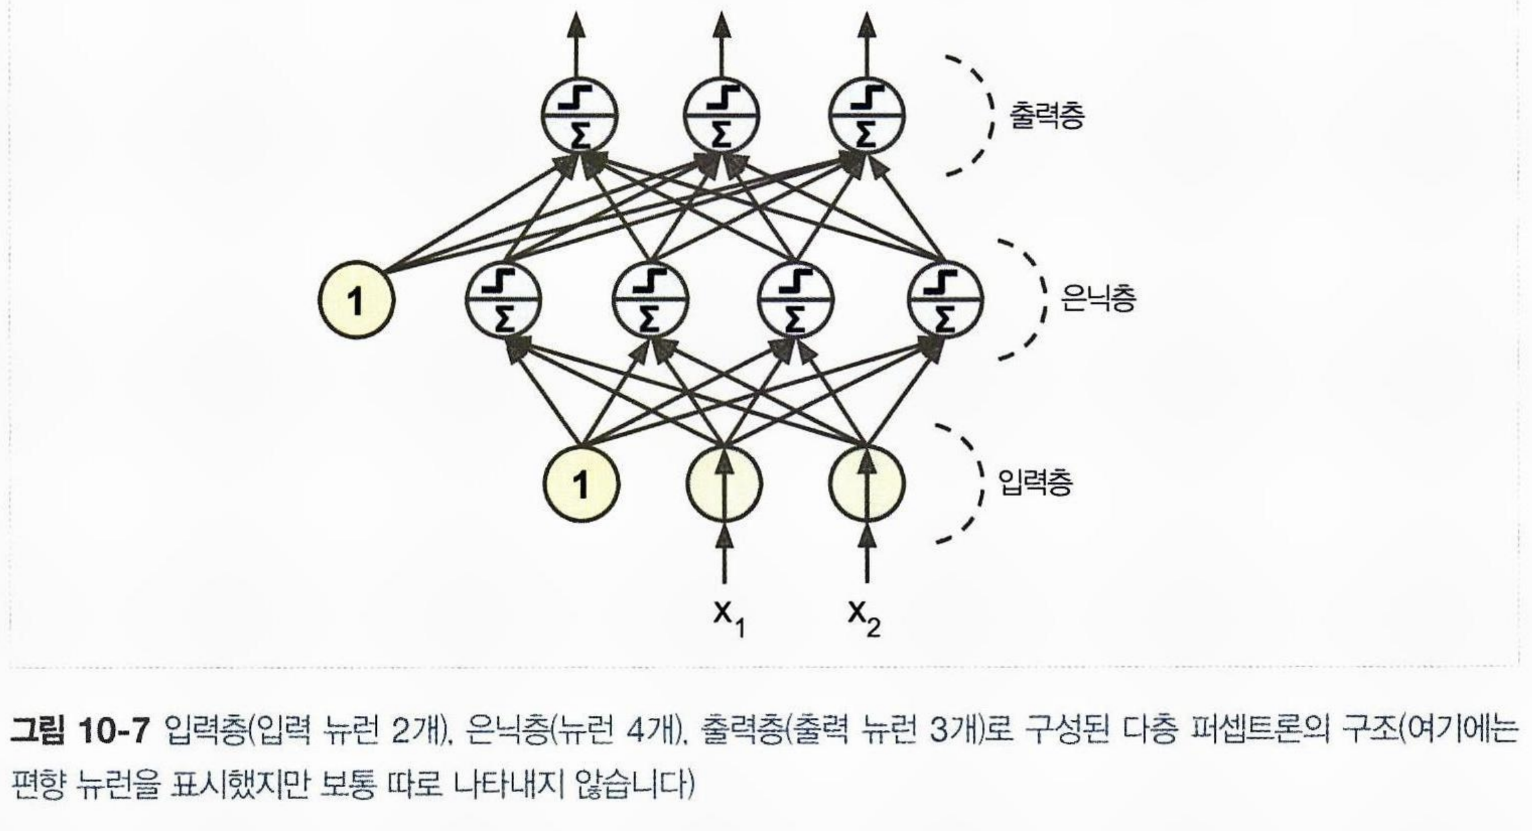
> 연구자들은 오랫동안 다층 퍼셉트론을 훈련할 방법을 찾는데 고군분투했다. 그리고 역전파 알고리즘이 그 문제를 해결해주었다.<br>


## 역전파(Backpropagation) 알고리즘
: 효율적인 기법으로 **gradient를 자동으로 계산하는 경사 하강법**이다. 네트워크를 feedforward 한 번, 역방향 한 번 통과하는 것만으로 모든 모델 파라미터에 대한 네트워크 오차의 gradient를 계산할 수 있다. 즉 오차를 감소시키기 위해 각 연결 가중치와 편향값이 어떻게 바뀌어야 할지 알 수 있다. gradient를 구하고 나면 평범한 경사하강법을 수행한다. 전체 과정은 네트워크가 어떤 해결책으로 수렴될 때까지 반복된다. 각 반복은 epoch라고 한다.
> 알고리즘 순서   
>   1. 정방향: 각 훈련 샘플에 대해 역전파 알고리즘이 먼저 정방향 계산을 하여 예측을 만들고 **오차를 측정**한다.   
>   2. 역방향: 역방향으로 각 층을 거치면서 **각 연결이 오차에 기여한 정도를 측정**한다.   
>   3. 경사 하강법: 1에서 측정한 오차가 감소하도록 **가중치를 조정**한다.<br>
        ⭐️ 은닉층의 연결 가중치를 랜덤하게 초기화 하는 것이 중요하다.   <br> 
          가중치를 랜덤하게 초기화하면 대칭성이 깨지므로 역전파가 전체 뉴런을 다양하게 훈련할 수 있다.<br>
          
> 역전파 알고리즘은 뭐가 다른데??
> - 역전파 알고리즘은 개발한 논문의 저자들은 활성 함수를 바꿔 다층 퍼셉트론 구조에 중요한 변화를 주었다. 바로 스탭함수를 로지스틱(시크모이드)함수로 바꾼 것이다.<br>
> 🙌 스탭 함수에는 수평선밖에 없으니 계산할 gradient가 없다. 경사하강법은 평편한 곳을 이동할 수 없다. 반면 로지스틱 함수는 어디서든지 0이 아닌 gradient가 잘 정의되어 있다. 즉 기울기가 있어 [미분](https://blog.naver.com/PostView.naver?blogId=soosaem&logNo=10095743293) 가능하다.<br>

## Active function
**활성 함수는 왜 필요할까?**<br>
: 선형 변환을 여러 개 연결해도 얻을 수 있는 것은 선형 변환뿐이다. 즉 층 사이에 비선형성을 추가하지 않으면 아무리 층을 많이 쌓아도 하나의 층과 동일해진다. 이러한 층으로는 복잡한 문제를 풀 수 없다. 반면에 비선형 활성 함수가 있는 충분히 큰 DNN은 이론적으로 어떤 연속 함수도 근사할 수 있다.
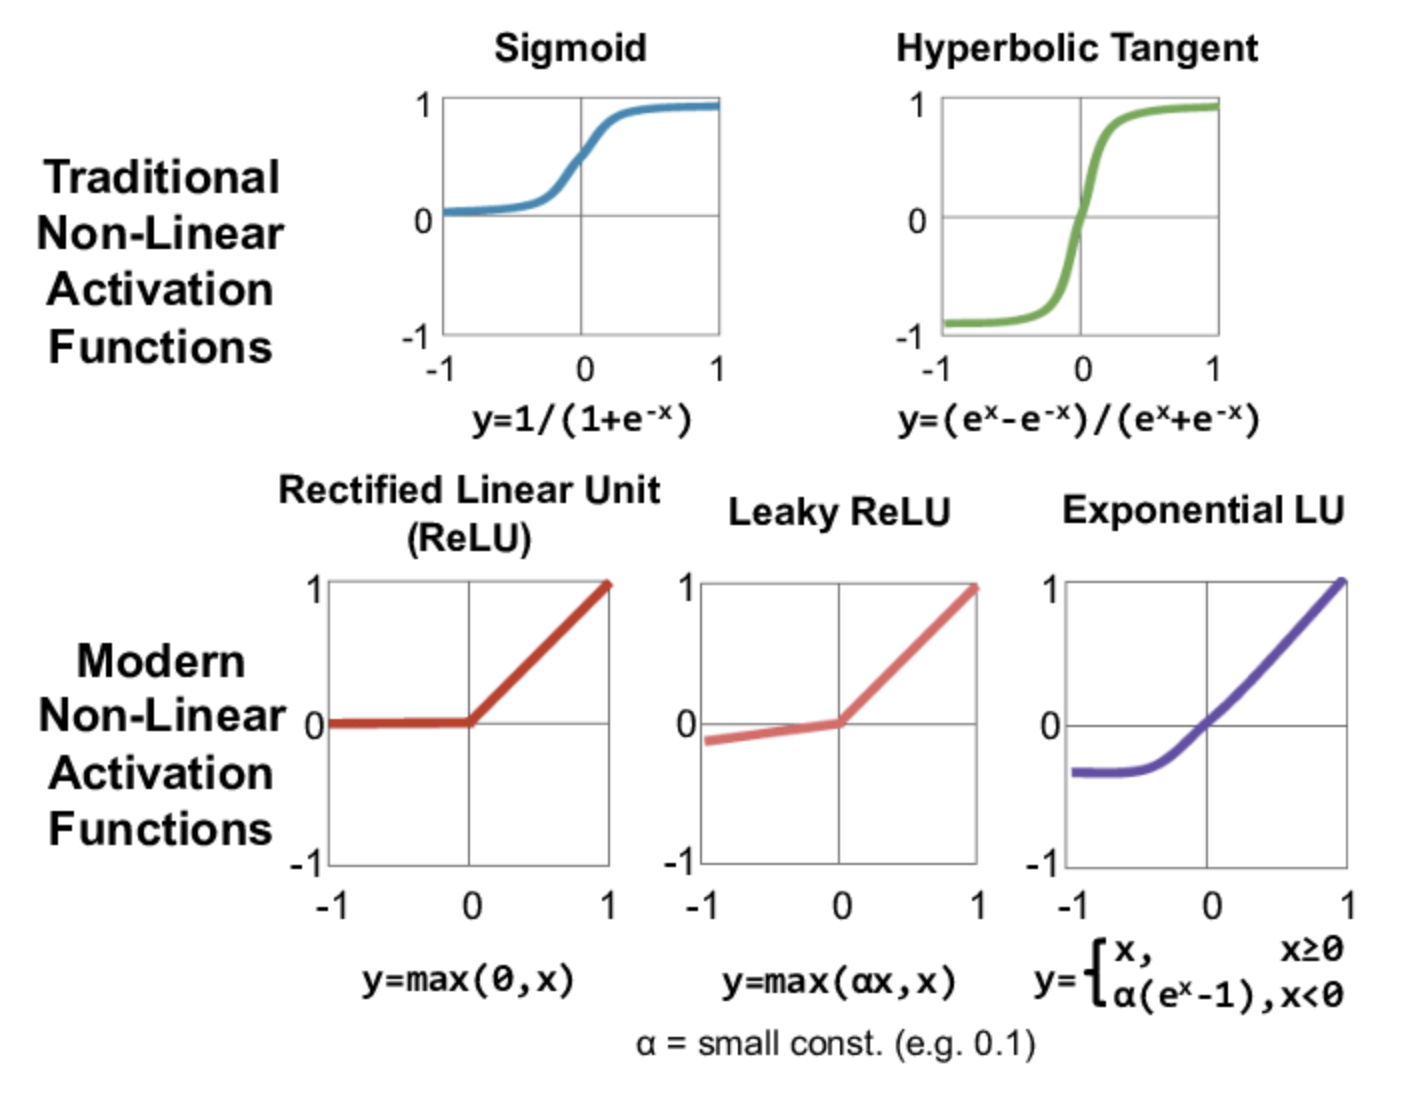
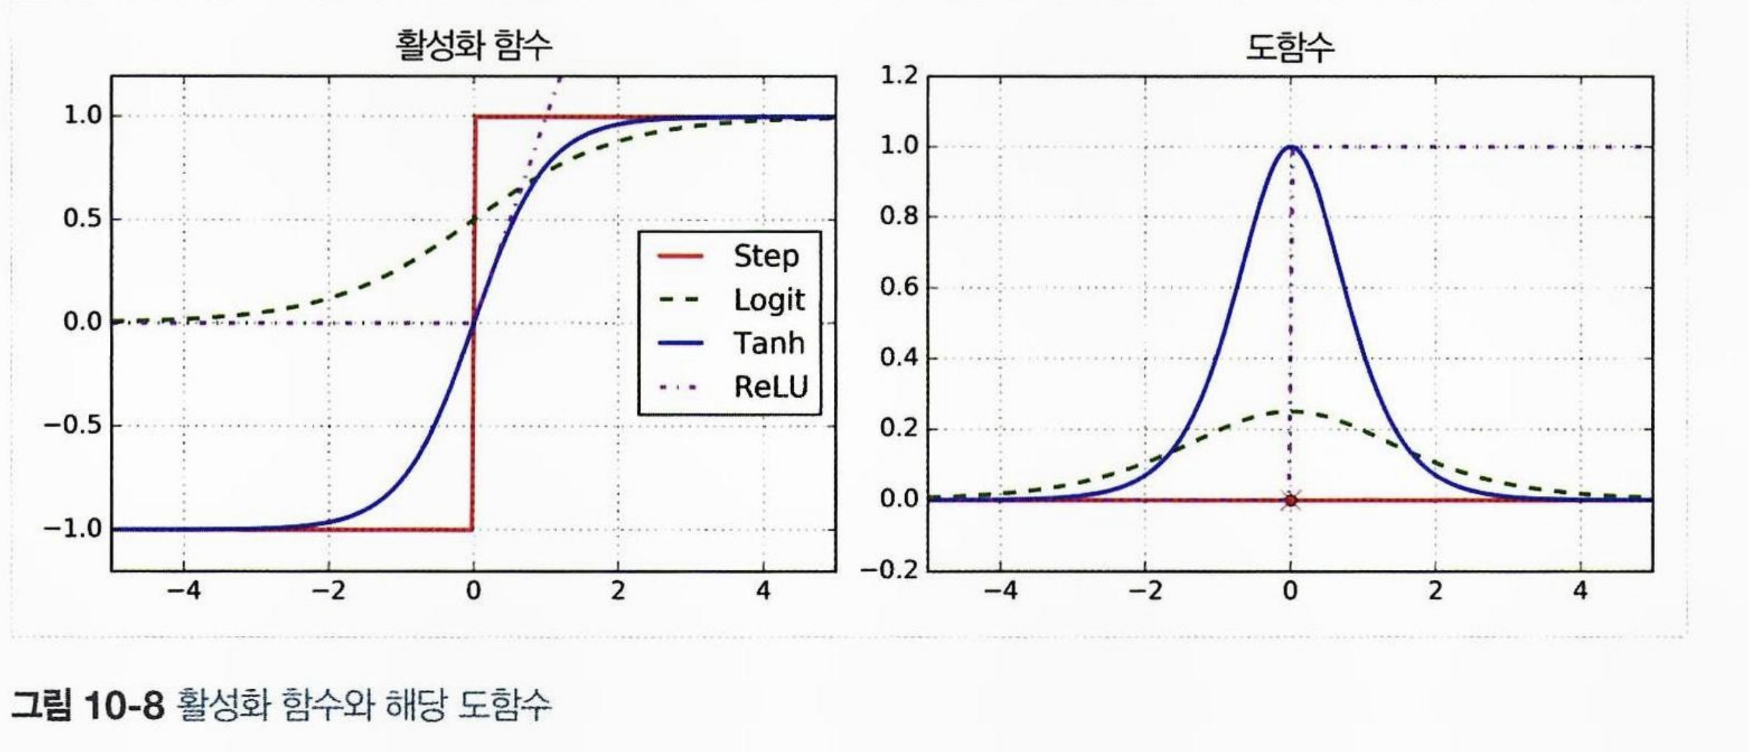<br>
- 로지스틱 함수(출력 범위: 0 ~ 1)나 hyperbolic tangent 함수(출력 범위: -1 ~ 1)는 출력 범위가 한정되어 있어 양극단에서 기울기가 급격히 감소하므로 오차 gradient를 잘 역전파하지 못한다. 일반적으로 ReLu 함수가 인공 신경망에서 잘 작동한다. 생물학적 뉴런이 S자 모양의 시그모이드 함수를 구현한 것처럼 보이기 때문에 오랜 시간 동안 연구자들은 시그모이드 함수에 집착했다. 하지만 ReLu 함수가 성능이 더 좋았고, 이것이 인공 신경망과 생물학적 비유의 오해가 불러일으킨 사례이다. 인공지능 알고리즘은 점차 생물학적 뉴런과 다른 방식으로 발전하고 있다.


In [8]:
# version check
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
# print(keras.__version__)

2.13.0
